In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/imports.ipynb")

Populating the interactive namespace from numpy and matplotlib


/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)


potentially a third heatmap 

In [2]:
classI = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.class_i.csv', index_col=0)
classII = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.class_ii.csv', index_col=0)

In [4]:
# Need to make germline class I matrices
classI_germline = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.germline.class_i.csv', index_col=0)
classII_germline = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.germline.class_ii.csv', index_col=0)

In [5]:
classI.head()

,BRAF_V600E,IDH1_R132H,PIK3CA_E545K,PIK3CA_H1047R,KRAS_G12D,KRAS_G12V,PIK3CA_E542K,NRAS_Q61R,KRAS_G12C,KRAS_G13D,...,NOTCH1_ifd_136518618,PIK3R1_ifd_68295304,CTNNB1_ifd_41224643,PIK3R1_ifd_68293795,ERBB2_ifi_39724728,EGFR_ifd_55174773,TP53_ifd_7675066,BRAF_ifd_140778037,MAP2K1_ifd_66436756,EGFR_ifd_55173986
TCGA-DH-A7UV,3.121455,2.669782,5.410144,11.670615,3.346380,1.290563,0.539980,3.974573,2.072653,3.591180,...,10.023656,5.007782,1.352657,14.478190,0.218066,1.172638,3.733680,1.071241,0.164009,3.785010
TCGA-DH-A7UT,1.622589,2.809934,3.745498,2.066738,4.247754,1.281134,0.462080,3.863594,1.820371,4.252850,...,6.658636,0.191098,0.977175,11.691608,2.100346,0.776297,3.502862,0.443422,0.102118,1.836676
TCGA-DH-A7UU,13.035144,2.321219,17.158570,2.170015,4.568261,1.735469,4.656085,3.837563,3.540984,4.615385,...,17.620928,0.343109,3.364486,21.409874,0.118091,3.206107,3.343949,1.880597,0.369610,8.622914
TCGA-DH-A7UR,2.976900,5.283770,4.060954,2.679426,4.090909,1.976503,1.943233,4.855731,2.344840,4.117179,...,3.791520,2.556488,0.445787,9.604060,1.743106,4.226370,7.675281,0.331034,1.146909,1.668463
TCGA-DH-A7US,9.973523,11.408972,1.452903,5.688817,3.128834,2.941618,3.043294,3.342175,4.207577,3.456418,...,8.130182,6.139012,2.755148,2.818378,0.199737,2.644281,17.748077,4.145873,0.787201,2.333799


In [6]:
def get_values_from_df(df):
    values = []
    for a in df.values:
        values.extend(a)
    return values

In [7]:
classI_values = get_values_from_df(classI)
classII_values = get_values_from_df(classII)

In [8]:
classI_germline_values = get_values_from_df(classI_germline)
classII_germline_values = get_values_from_df(classII_germline)

In [13]:
pd.Series(classI_values).quantile(.1), pd.Series(classI_values).quantile(.3), pd.Series(classI_values).quantile(.5)

(0.30591642884600001, 1.01818181818, 1.9762122598400003)

In [14]:
pd.Series(classII_values).quantile(.1), pd.Series(classII_values).quantile(.3), pd.Series(classII_values).quantile(.5)

(2.6324786324799998, 10.909090909100001, 21.3953488372)

In [9]:
def make_binary_I(x):
    if x < .3:
        return 1
    else:
        return 0
def make_binary_II(x):
    if x < 2.6:
        return 1
    else:
        return 0

In [10]:
classI_binary = classI.copy()
classII_binary = classII.copy()
classI_germline_binary = classI_germline.copy()
classII_germline_binary = classII_germline.copy()

In [11]:
for col in classI_binary.columns:
    classI_binary[col] = classI[col].apply(make_binary_I)
for col in classII_binary.columns:
    classII_binary[col] = classII[col].apply(make_binary_II)

In [12]:
for col in classI_germline_binary.columns:
    classI_germline_binary[col] = classI_germline[col].apply(make_binary_I)
for col in classII_germline_binary.columns:
    classII_germline_binary[col] = classII_germline[col].apply(make_binary_II)

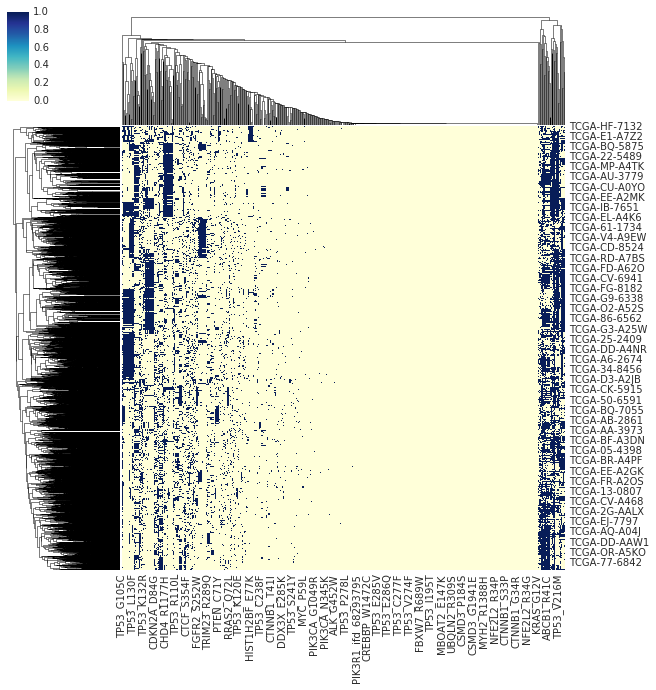

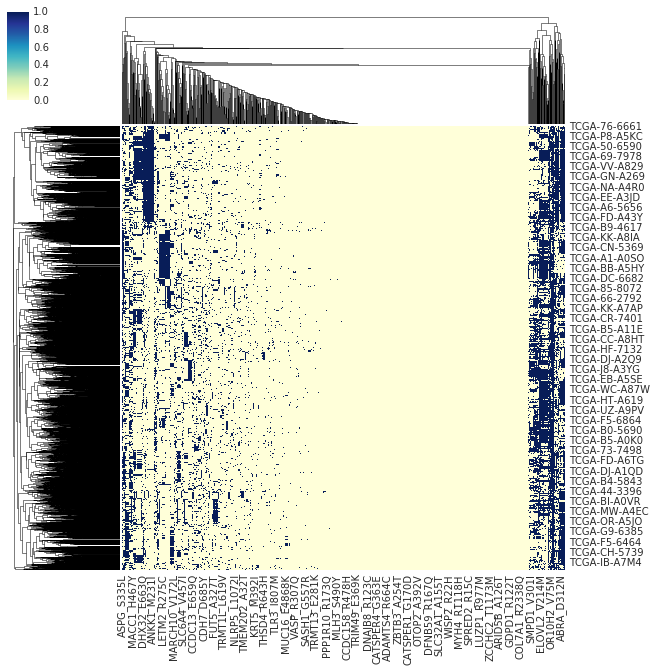

In [16]:
sns.clustermap(classI_binary, cmap="YlGnBu" )
plt.show()
plt.clf()
sns.clustermap(classI_germline_binary, cmap="YlGnBu" )

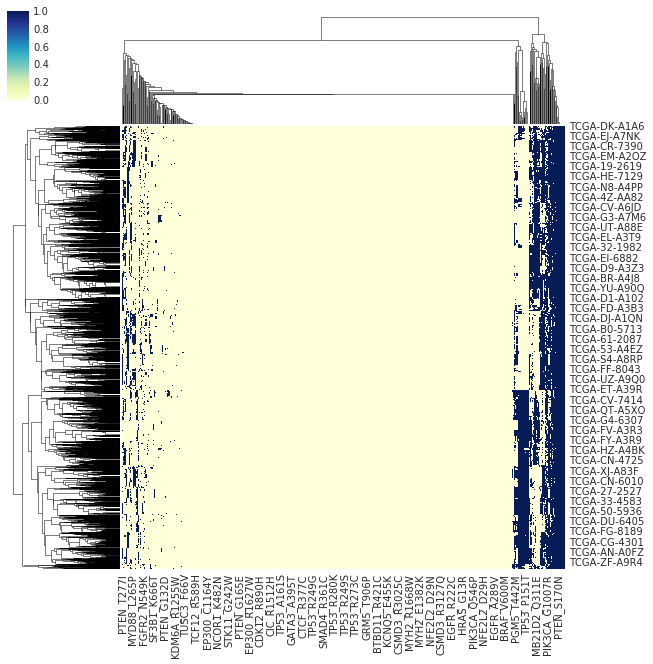

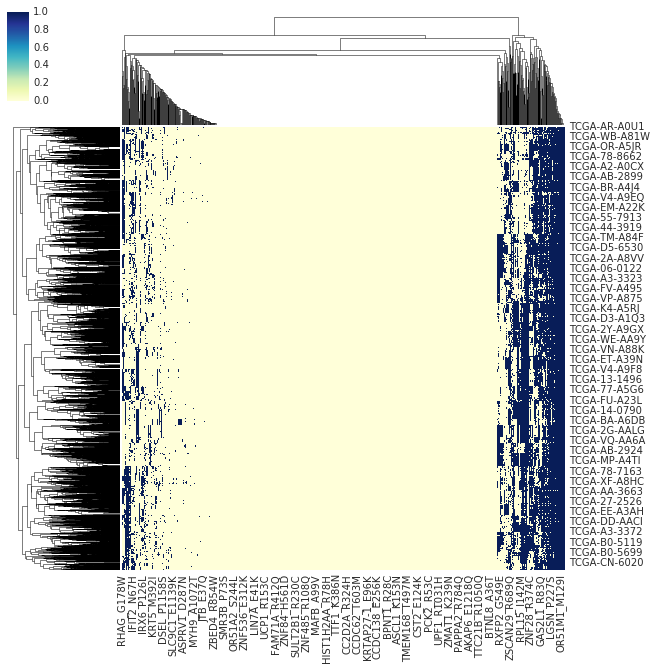

In [17]:
sns.clustermap(classII_binary, cmap="YlGnBu" )
plt.show()
plt.clf()
sns.clustermap(classII_germline_binary, cmap="YlGnBu" )

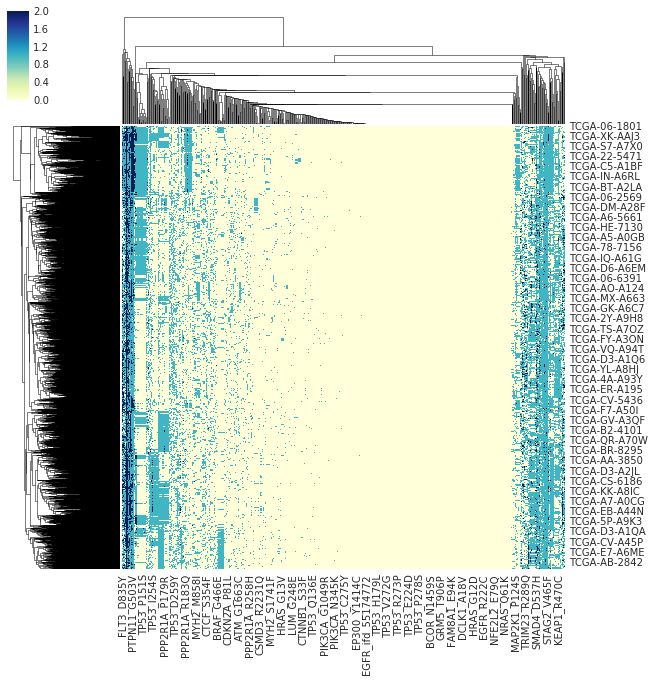

In [13]:
combined_binary = classI_binary.add(classII_binary)
sns.clustermap(combined_binary, cmap="YlGnBu" )

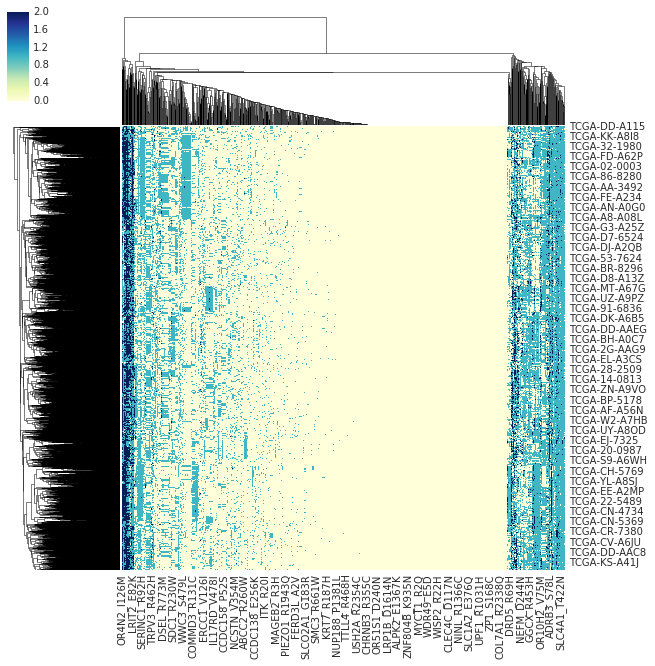

In [15]:
combined_germline_binary = classI_germline_binary.add(classII_germline_binary)
sns.clustermap(combined_germline_binary, cmap="YlGnBu" )

In [ ]:
# should compare what this looks like in comparison to germline mutation matrices... 

What are the different clusters?

In [74]:
patient_mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_mutations.csv', index_col=0)

In [75]:
I_presentation = pd.DataFrame(classI_binary.sum())
I_presentation.columns = ['I']

In [76]:
II_presentation = pd.DataFrame(classII_binary.sum())
II_presentation.columns = ['II']

In [77]:
mutation_counts = pd.DataFrame(patient_mutations.sum())
mutation_counts.columns = ['observed']

In [78]:
mutation_presentation = pd.DataFrame(combined_binary.sum())
mutation_presentation.columns = ['presentation']

In [79]:
merged = pd.merge(pd.merge(I_presentation, II_presentation, left_index=True, right_index=True), 
                           pd.merge(mutation_counts, mutation_presentation, left_index=True, right_index=True),
                           left_index=True, right_index=True)

In [80]:
merged.head()

,I,II,observed,presentation
BRAF_V600E,0,0,285,0
IDH1_R132H,0,0,212,0
PIK3CA_E545K,0,0,82,0
PIK3CA_H1047R,0,0,62,0
KRAS_G12D,0,0,89,0


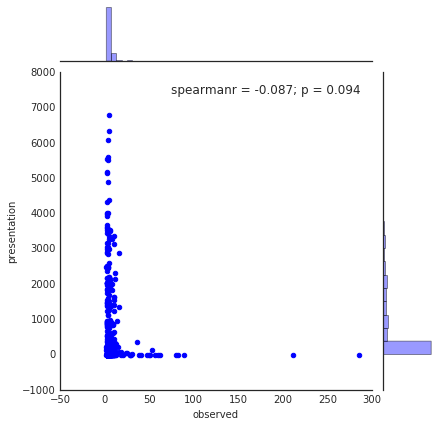

In [81]:
sns.jointplot(merged.observed, merged.presentation, stat_func=sp.spearmanr)

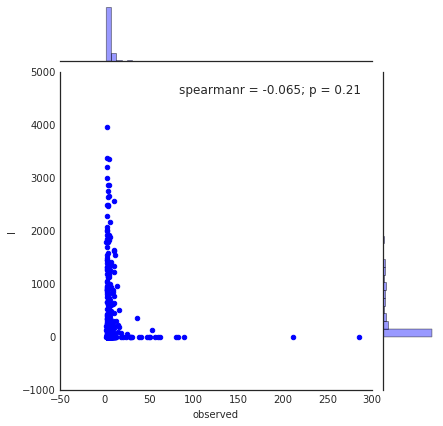

In [82]:
sns.jointplot(merged.observed, merged.I, stat_func=sp.spearmanr)

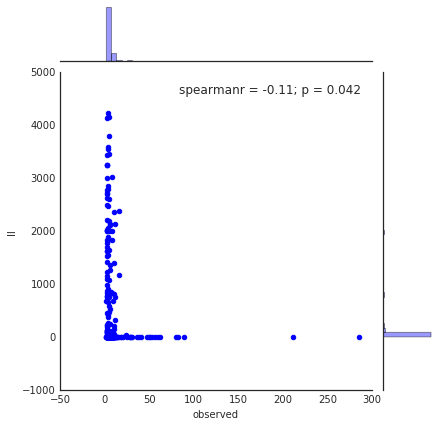

In [83]:
sns.jointplot(merged.observed, merged.II, stat_func=sp.spearmanr)

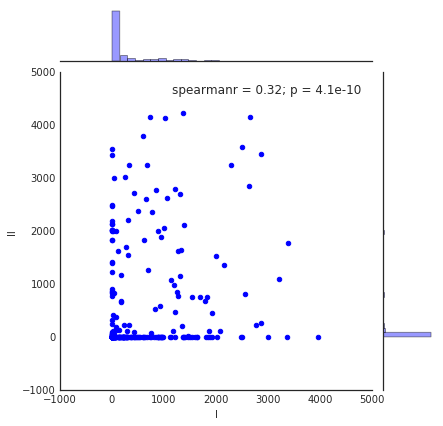

In [84]:
sns.jointplot(merged.I, merged.II, stat_func=sp.spearmanr)